<a href="https://colab.research.google.com/github/amfaller/MassTrack-MBTA/blob/main/MassTrack_MBTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MassTrack: MBTA
This Colab notebook serves as a scratch pad to analyze MBTA data for the Green Line portion of the MassTrack system.

## Fetch Data

The data is located in a Zenodo repository located here: https://zenodo.org/records/15121997

This is the same zip file available directly from the MBTA data repository: https://mbta-massdot.opendata.arcgis.com/datasets/0b4dc16b8b984836962229865d5b573b/about

In [1]:
!wget -O TravelTimes_2024.zip "https://zenodo.org/record/15121997/files/TravelTimes_2024.zip?download=1"

--2025-04-08 20:03:24--  https://zenodo.org/record/15121997/files/TravelTimes_2024.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/15121997/files/TravelTimes_2024.zip [following]
--2025-04-08 20:03:25--  https://zenodo.org/records/15121997/files/TravelTimes_2024.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1347504983 (1.3G) [application/octet-stream]
Saving to: ‘TravelTimes_2024.zip’

TravelTimes_2024.zi 100%[===================>]   1.25G  19.9MB/s    in 66s     

2025-04-08 20:04:32 (19.3 MB/s) - ‘TravelTimes_2024.zip’ saved [1347504983/1347504983]



In [2]:
import zipfile
import fnmatch

# Define your pattern
pattern = "TravelTimes_2024/2024-*_LRTravelTimes.csv"

# Open the zip file
with zipfile.ZipFile("TravelTimes_2024.zip", "r") as zip_ref:
    # List all files in the archive
    all_files = zip_ref.namelist()

    # Filter files that match the pattern
    matching_files = [f for f in all_files if fnmatch.fnmatch(f, pattern)]

    # Extract only the matching files
    for file in matching_files:
        zip_ref.extract(file, "TravelTimes_2024")

## Preprocess / Import the Datasets

The CSV files to analyze are all located in a directory `"TravelTimes_2024/TravelTimes_2024/2024-XY_LRTravelTimes.csv"` where `XY` correspond to a month -- i.e. January is `2024-01_LRTravelTimes.csv`.

These files are large -- some are more than a gigabyte. However, it contains data for ALL trains, not just the Green line. Pre-process them via the filesystem.

In [3]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-01_LRTravelTimes.csv > 2024-01.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-01_LRTravelTimes.csv >> 2024-01.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-02_LRTravelTimes.csv > 2024-02.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-02_LRTravelTimes.csv >> 2024-02.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-03_LRTravelTimes.csv > 2024-03.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-03_LRTravelTimes.csv >> 2024-03.csv

In [4]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-04_LRTravelTimes.csv > 2024-04.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-04_LRTravelTimes.csv >> 2024-04.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-05_LRTravelTimes.csv > 2024-05.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-05_LRTravelTimes.csv >> 2024-05.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-06_LRTravelTimes.csv > 2024-06.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-06_LRTravelTimes.csv >> 2024-06.csv

In [5]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-07_LRTravelTimes.csv > 2024-07.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-07_LRTravelTimes.csv >> 2024-07.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-08_LRTravelTimes.csv > 2024-08.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-08_LRTravelTimes.csv >> 2024-08.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-09_LRTravelTimes.csv > 2024-09.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-09_LRTravelTimes.csv >> 2024-09.csv

In [6]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-10_LRTravelTimes.csv > 2024-10.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-10_LRTravelTimes.csv >> 2024-10.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-11_LRTravelTimes.csv > 2024-11.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-11_LRTravelTimes.csv >> 2024-11.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-12_LRTravelTimes.csv > 2024-12.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-12_LRTravelTimes.csv >> 2024-12.csv


In [7]:
import pandas as pd

# Helper functions to load each month
def loadJan():
    return pd.read_csv("2024-01.csv")

def loadFeb():
    return pd.read_csv("2024-02.csv")

def loadMar():
    return pd.read_csv("2024-03.csv")

def loadApr():
    return pd.read_csv("2024-04.csv")

def loadMay():
    return pd.read_csv("2024-05.csv")

def loadJun():
    return pd.read_csv("2024-06.csv")

def loadJul():
    return pd.read_csv("2024-07.csv")

def loadAug():
    return pd.read_csv("2024-08.csv")

def loadSep():
    return pd.read_csv("2024-09.csv")

def loadOct():
    return pd.read_csv("2024-10.csv")

def loadNov():
    return pd.read_csv("2024-11.csv")

def loadDec():
    return pd.read_csv("2024-12.csv")

# Store function references for easy iteration
dataLoadFunctions = [
    loadJan, loadFeb, loadMar, loadApr, loadMay, loadJun,
    loadJul, loadAug, loadSep, loadOct, loadNov, loadDec
]

months = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

## RQ1: Does the combination of [*to_stop_arrival_datetime*, *to_stop_name*] constitute a pseudo-identifier?

In [8]:
def RQ1(df):
  rq1 = df.groupby(["to_stop_arrival_datetime", "to_stop_name",]).size().reset_index(name="count")

  uniqueRows = (rq1["count"] == 1).sum()
  percentage = (uniqueRows / len(rq1)) * 100
  return percentage

In [9]:
percentages = []

for loadFn in dataLoadFunctions:
  df = loadFn()
  monthPercentUnique = RQ1(df)
  percentages.append(monthPercentUnique)
  del df

<ipython-input-7-03f632ee01ab>:5: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-01.csv")
<ipython-input-7-03f632ee01ab>:8: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-02.csv")
<ipython-input-7-03f632ee01ab>:11: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-03.csv")
<ipython-input-7-03f632ee01ab>:14: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-04.csv")
<ipython-input-7-03f632ee01ab>:17: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-05.csv")
<ipython-input-7-03f632ee01ab>:20: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.


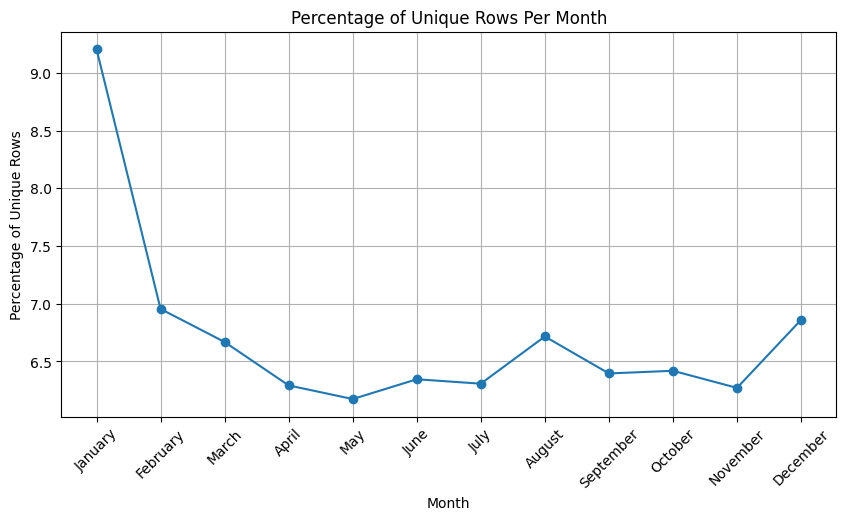

In [10]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(months, percentages, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Percentage of Unique Rows")
plt.title("Percentage of Unique Rows Per Month")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(True)
plt.show()

## RQ2: Does the combination of [to_stop_arrival_datetime, to_stop_name, direction] constitute a pseudo-identifier?


In [11]:
def RQ2(df):
  rq2 = df.groupby(["to_stop_arrival_datetime", "to_stop_name", "direction"]).size().reset_index(name="count")

  uniqueRows = (rq2["count"] == 1).sum()
  percentage = (uniqueRows / len(rq2)) * 100
  return percentage

In [12]:
percentages = []

for loadFn in dataLoadFunctions:
  df = loadFn()
  monthPercentUnique = RQ2(df)
  percentages.append(monthPercentUnique)
  del df

<ipython-input-7-03f632ee01ab>:5: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-01.csv")
<ipython-input-7-03f632ee01ab>:8: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-02.csv")
<ipython-input-7-03f632ee01ab>:11: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-03.csv")
<ipython-input-7-03f632ee01ab>:14: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-04.csv")
<ipython-input-7-03f632ee01ab>:17: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("2024-05.csv")
<ipython-input-7-03f632ee01ab>:20: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.


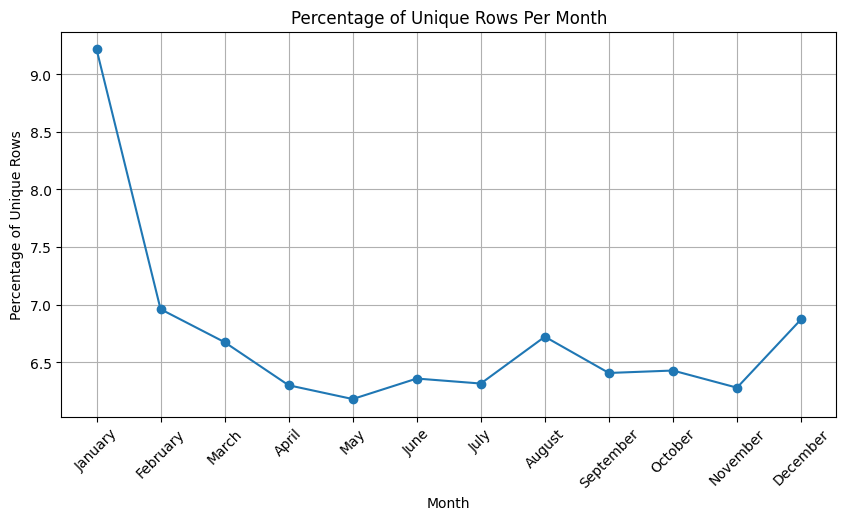

In [13]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(months, percentages, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Percentage of Unique Rows")
plt.title("Percentage of Unique Rows Per Month")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(True)
plt.show()